In [1]:
#%cd "/My Drive/Colab Notebooks/Syraj-Homework"
%cd /content/drive/My Drive/Colab Notebooks/Syraj-Homework/

/content/drive/My Drive/Colab Notebooks/Syraj-Homework


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
img_height = 192
img_width =  256
model_name = 'model_2.h5'

In [4]:
# %%
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range = 90,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode='nearest',
    dtype = 'float32'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                'dataset/train',
                target_size=(img_height, img_width),
                batch_size = 64,
)
validation_generator = test_datagen.flow_from_directory(
                'dataset/validation',
                target_size=(img_height, img_width),
                batch_size=64,
)

Using TensorFlow backend.


Found 2290 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [5]:
from keras.models import Model
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout, Input
from keras.optimizers import Adam, Adadelta

input = Input(shape=(img_height, img_width, 3))


x = Conv2D(32, (3,3), activation='relu', padding='same')(input)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x) # turns the output of the cnn into a 1D vector to be feed into fully connected layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x) #to avoid overfitting
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
out = Dense(5, activation='softmax')(x)

classifier = Model(input, out)
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [6]:
classifier.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 192, 256, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 192, 256, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 192, 256, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 96, 128, 32)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 96, 128, 32)       9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 96, 128, 32)       9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 64, 32)        0   

In [7]:
#TRAINING
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath=model_name,monitor='val_acc', verbose=0, save_best_only=True)

hist_classifier = classifier.fit_generator(
        train_generator,
        steps_per_epoch=10,
        epochs = 100,
        callbacks=[checkpointer], #save the best weights with the model
        validation_data=validation_generator,
        validation_steps=10
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
10/10 [==============================] - 17s 2s/step - loss: 1.6059 - acc: 0.2313 - val_loss: 1.6078 - val_acc: 0.2000
Epoch 2/100
10/10 [==============================] - 12s 1s/step - loss: 1.5934 - acc: 0.2439 - val_loss: 1.6106 - val_acc: 0.2000
Epoch 3/100
10/10 [==============================] - 12s 1s/step - loss: 1.6037 - acc: 0.2578 - val_loss: 1.6171 - val_acc: 0.2000
Epoch 4/100
10/10 [==============================] - 12s 1s/step - loss: 1.6017 - acc: 0.2422 - val_loss: 1.6145 - val_acc: 0.2000
Epoch 5/100
10/10 [==============================] - 12s 1s/step - loss: 1.6034 - acc: 0.2518 - val_loss: 1.6117 - val_acc: 0.2000
Epoch 6/100
10/10 [==============================] - 12s 1s/step - loss: 1.6009 - acc: 0.2500 - val_loss: 1.6120 - val_acc: 0.2000
Epoch 7/100
10/10 [==============================] - 12s 1s/step - loss: 1.5956 - acc: 0.2656 - val_loss: 1.5991 - val_a

In [10]:
from keras.models import load_model
mod = load_model(model_name)
mod.evaluate_generator(validation_generator, steps=10)[1] #just the accuracy

0.5400000047683716

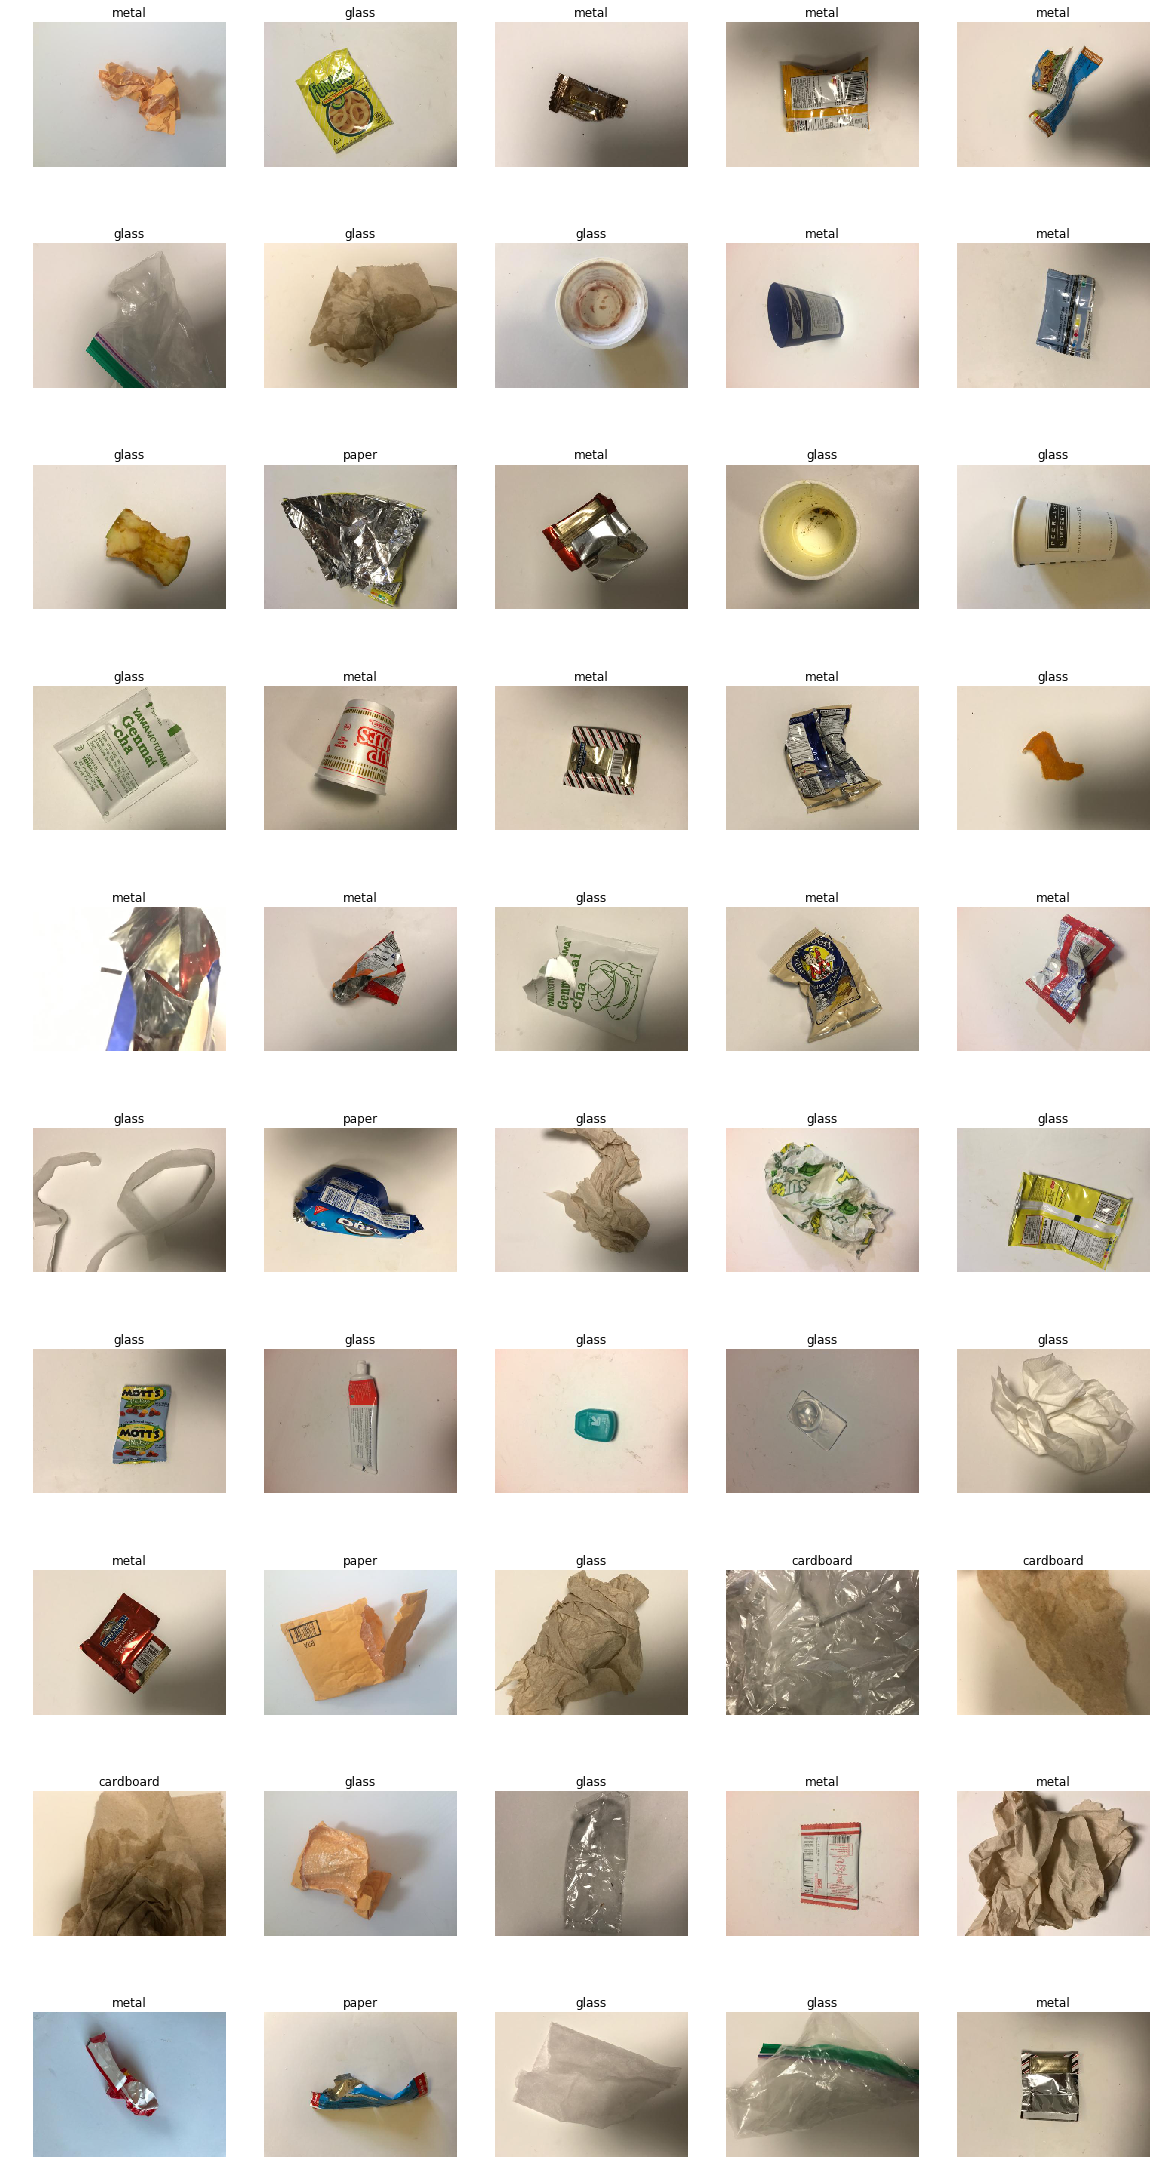

In [11]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import img_to_array, load_img
from keras.preprocessing.image import array_to_img


test_input = []
test_path = './dataset/test/trash/'
label_name = ['cardboard','glass','metal','paper','plastic']

for path in glob.glob(test_path + '*.jpg'):
  tmp = load_img(path, target_size=(img_height,img_width))
  tmp = img_to_array(tmp)
  tmp = tmp.astype(dtype='float32')
  tmp /= 255
  test_input.append(tmp)

test_input = np.reshape(test_input, (-1,img_height,img_width,3))
output_data = classifier.predict(test_input)
test_predict = np.argmax(output_data, axis=1)

plt.figure(figsize=(20,40))
for img in range(np.shape(output_data)[0]):
  plt.subplot(10, 5, img+1)
  plt.axis('off')
  plt.title(label_name[test_predict[img]])
  plt.imshow(array_to_img(test_input[img]))
  if img == 49:
    break

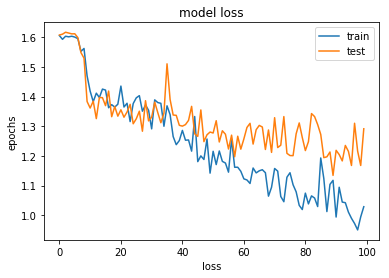

In [12]:
import matplotlib.pyplot as plt

plt.plot(hist_classifier.history['loss'])
plt.plot(hist_classifier.history['val_loss'])
plt.title('model loss')
plt.xlabel('loss')
plt.ylabel('epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.show()